In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
# Reading in data from a CSV file
df = pd.read_csv('gym_members_exercise_tracking.csv')
print(df.head())

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

In [3]:
df.shape

# 973 rows and 15 columns

(973, 15)

In [4]:
# two categorical variables are object types, Gender and Workout_Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [5]:
# Check for missing values
print(df.isnull().sum())

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


In [6]:
# Descriptive statistics for numeric features
print(df.describe())

              Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000 

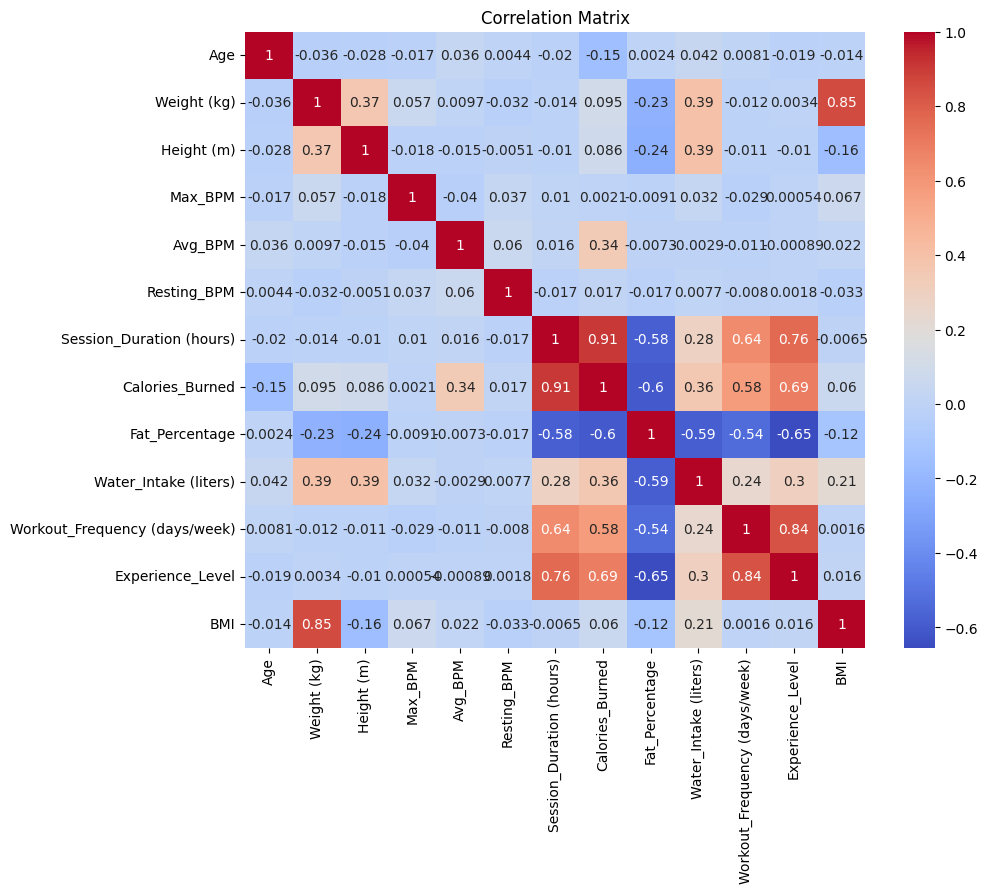

In [7]:
# Correlation matrix to check for multicollinearity
numeric_columns = df.drop(columns=['Gender', 'Workout_Type'])

corr_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# high correlation between calories burned and session duration

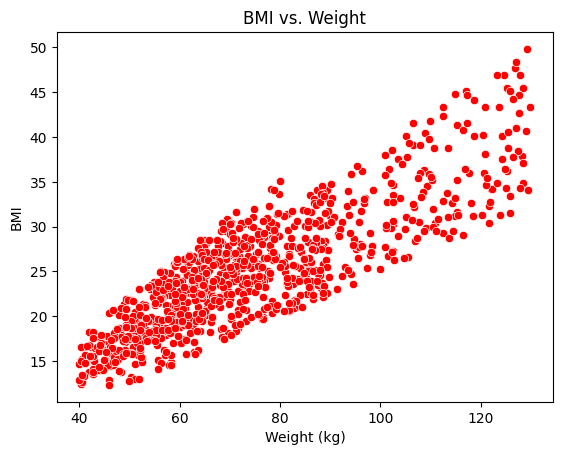

In [8]:
# Next highest correlation is between weight and BMI
# To be expected, since BMI is directly calculated with weight
sns.scatterplot(x='Weight (kg)', y='BMI', data=df, color='red')
plt.title("BMI vs. Weight")
plt.show()

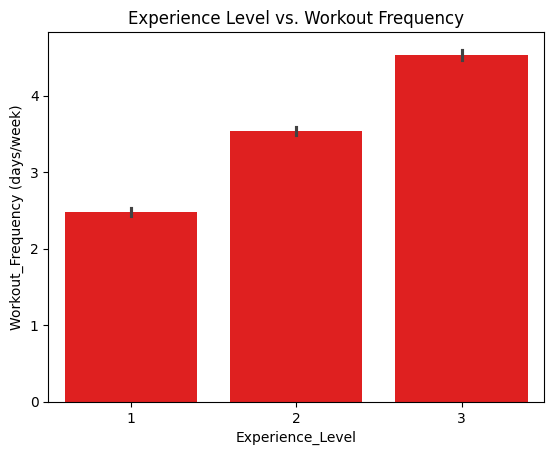

In [9]:
# Next is between Experience level and Workout Frequency
# Since Experience level is an ordinal variable, we can use barplot
# Need to execute data cleaning to use Experience level as an ordinal variable
sns.barplot(x='Experience_Level', y='Workout_Frequency (days/week)', data=df, color='red')
plt.title("Experience Level vs. Workout Frequency")
plt.show()

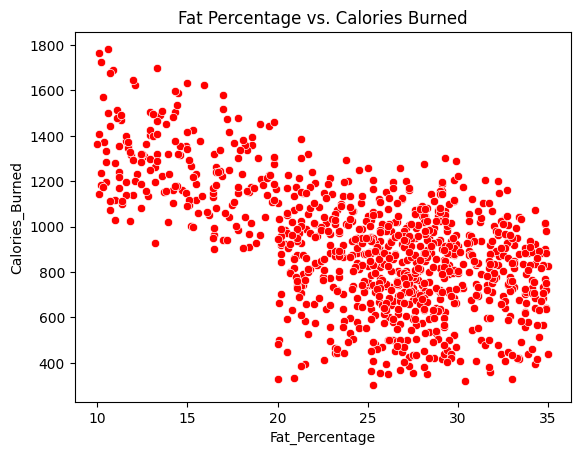

In [10]:
# To show correlation between Fat Percentage and Calories Burned: R^2=-0.60
sns.scatterplot(x='Fat_Percentage', y='Calories_Burned', data=df, color='red')
plt.title("Fat Percentage vs. Calories Burned")
plt.show()

In [11]:
# Data Cleaning
# Change 1, 2, 3 experience level to beginner, intermediate, advanced
df['Experience_Level'] = df['Experience_Level'].replace({1: 'Beginner', 2: 'Intermediate', 3: 'Advanced'})

df['Experience_Level'].head()

0        Advanced
1    Intermediate
2    Intermediate
3        Beginner
4        Beginner
Name: Experience_Level, dtype: object

In [12]:
# Separate BMI column into 2 groups
# Calculate the mean of the column
mean_value = df['BMI'].mean()

# Use np.where to categorize based on the mean
# mean for BMI is 24.9 for this dataset
df['BMI_categorized'] = np.where(df['BMI'] > mean_value, 'less than 24.9', 'greater than 24.9')

print(df['BMI_categorized'].head())

0       less than 24.9
1       less than 24.9
2    greater than 24.9
3    greater than 24.9
4    greater than 24.9
Name: BMI_categorized, dtype: object


In [13]:
# Data Preprocessing
# importing StandardScaler from scikit-learn
scaler = StandardScaler()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [15]:
# List of columns to scale
numeric_cols = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)','Workout_Frequency (days/week)','BMI']

# Scale only the selected columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# showing scaled data on numeric variables
print(df.head())
 

        Age  Gender  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
0  1.422343    Male     0.681493   -0.098545  0.010081  0.922970    -0.303555   
1  0.600965  Female     0.049316   -1.508604 -0.076726  0.504494     0.515749   
2 -0.548964  Female    -0.271491   -0.490228 -1.118414 -1.518142    -1.122858   
3 -1.123928    Male    -0.974433   -0.176881  0.878155  1.411193    -0.849757   
4 -0.056137    Male    -1.309393    0.528148  0.704540  0.992716     0.788850   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                  1.264598         1.495690         Yoga       -1.978321   
1                  0.127098        -0.082284         HIIT        1.426301   
2                 -0.427068        -0.838243       Cardio        1.346380   
3                 -1.943735        -1.370351     Strength        0.611110   
4                 -1.797902        -1.282278     Strength        0.675047   

   Water_Intake (liters)  Workout_Frequency (days/

In [16]:
#importing from sklearn to split the data set into train and test
from sklearn.model_selection import train_test_split

#importing from sklearn the needed package to build a K-nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

In [17]:
df = df.drop(columns=['Gender', 'Workout_Type', 'BMI_categorized'])

In [19]:
#Seperating the data into features (X) and target (y)
X = df.drop('Experience_Level', axis = 1)
Y = df['Experience_Level']

In [20]:
df.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,1.422343,0.681493,-0.098545,0.010081,0.922970,-0.303555,1.264598,1.495690,-1.978321,1.455967,0.743295,Advanced,0.794278
1,0.600965,0.049316,-1.508604,-0.076726,0.504494,0.515749,0.127098,-0.082284,1.426301,-0.877898,0.743295,Intermediate,1.064652
2,-0.548964,-0.271491,-0.490228,-1.118414,-1.518142,-1.122858,-0.427068,-0.838243,1.346380,-0.544488,0.743295,Intermediate,-0.030361
3,-1.123928,-0.974433,-0.176881,0.878155,1.411193,-0.849757,-1.943735,-1.370351,0.611110,-0.877898,-0.352502,Beginner,-0.976669
4,-0.056137,-1.309393,0.528148,0.704540,0.992716,0.788850,-1.797902,-1.282278,0.675047,0.289035,-0.352502,Beginner,-1.580503


In [21]:
#splits the dataset, used deafault split of 75%, 25%
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, random_state=42)

In [22]:
#Building the K-nearest neighbors classifier model using 5 neighbors
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

#checking the accuracy of the model
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.83


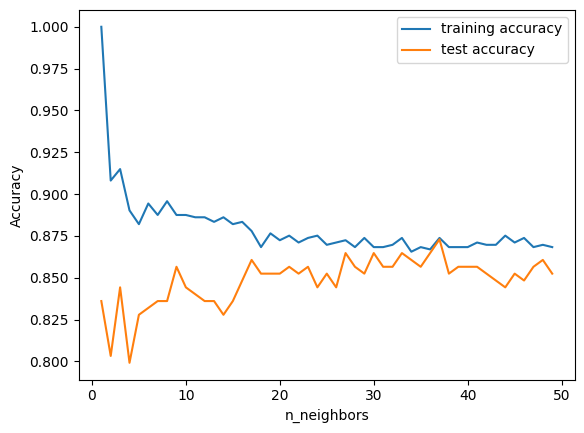

In [23]:
#Determing the best number of neighbors for the model

training_accuracy = []
test_accuracy = []
#trying n_neighbors from 1 to 50
neighbors_settings = range(1, 50)

#A for loop to determine the best number of neighbors
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(clf.score(X_test, y_test))


#plotting the results
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

#Based on the plot the best number of neighbors is 36

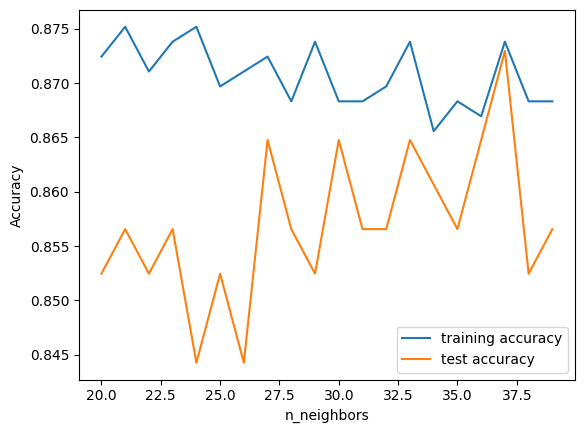

In [24]:
#Determing the best number of neighbors for the model

training_accuracy = []
test_accuracy = []
#trying n_neighbors from 20 to 40
neighbors_settings = range(20, 40)

#A for loop to determine the best number of neighbors
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(clf.score(X_test, y_test))


#plotting the results
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

#Based on the plot the best number of neighbors is 36

In [25]:
#Building the K-nearest neighbors classifier model using 36 neighbors
clf = KNeighborsClassifier(n_neighbors=36)
clf.fit(X_train, y_train)

#checking the accuracy of the model
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.86


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7506f6b3-54e7-4233-9738-29d8a07d1597' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>